In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv('SolarPrediction.csv')
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


## Конструирование признаков

In [3]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset['date_for_plot'] = pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['TimeOfDay(h)'] = dataset.index.hour
dataset['TimeOfDay(m)'] = dataset.index.hour*60 + dataset.index.minute
dataset['TimeOfDay(s)'] = dataset.index.hour*60*60 + dataset.index.minute*60 + dataset.index.second
dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S')
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S')
dataset['DayLength(s)'] = dataset['TimeSunSet'].dt.hour*60*60 \
                           + dataset['TimeSunSet'].dt.minute*60 \
                           + dataset['TimeSunSet'].dt.second \
                           - dataset['TimeSunRise'].dt.hour*60*60 \
                           - dataset['TimeSunRise'].dt.minute*60 \
                           - dataset['TimeSunRise'].dt.second
dataset.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,date_for_plot,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,2016-09-01 10:00:08,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,2016-09-01 10:05:10,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,2016-09-01 10:20:06,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,2016-09-01 10:25:05,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,2016-09-01 10:30:09,9,245,35,0,30,1809,45060


## Визуализация данных

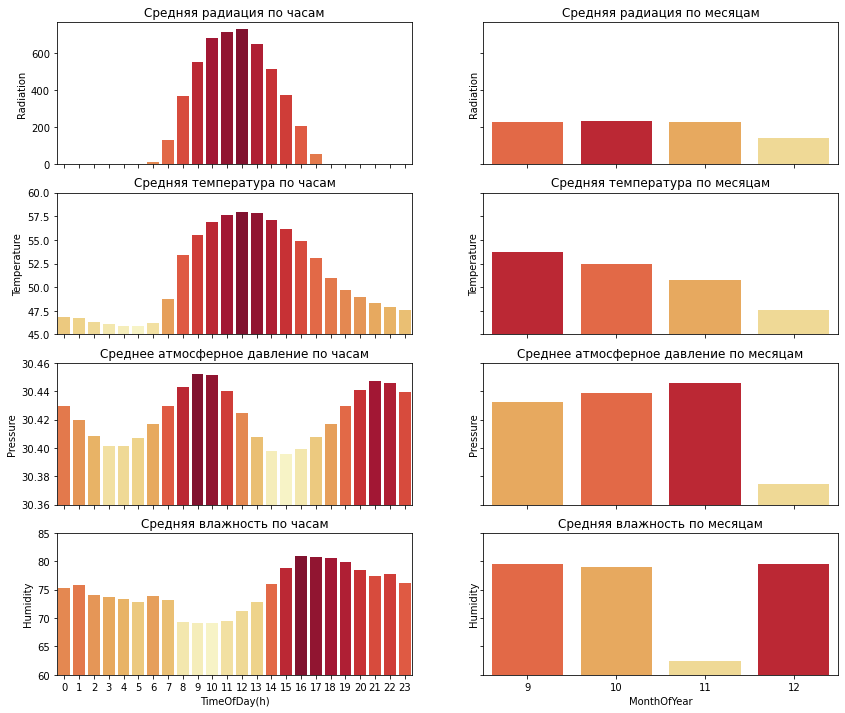

In [7]:
grouped_m=dataset.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = \
    plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))

ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Средняя радиация по часам')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, 
                palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Средняя радиация по месяцам')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, 
                palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Средняя температура по часам')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, 
                palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Средняя температура по месяцам')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, 
                palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Среднее атмосферное давление по часам')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, 
                palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Среднее атмосферное давление по месяцам')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, 
                palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Средняя влажность по часам')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, 
                palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Средняя влажность по месяцам')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, 
                palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

## Корреляция признаков

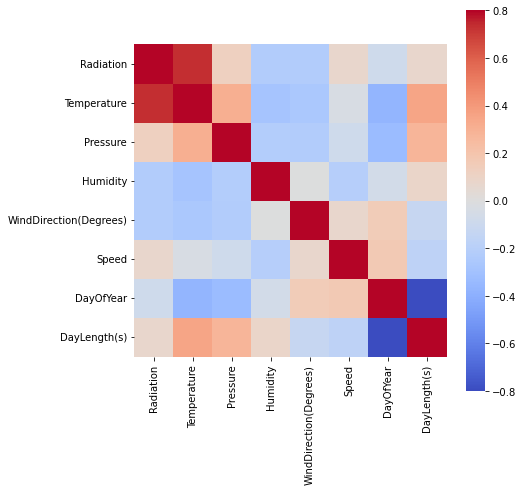

In [8]:
corrmat = dataset.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 
                        'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr() 
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

In [6]:
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
             'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = dataset['Radiation']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Отбор признаков

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

,Features,r2 Score
0,"Temperature, Pressure, Humidity, WindDirection...",0.932828
1,"Temperature, Humidity, WindDirection(Degrees),...",0.931395
2,"Temperature, Humidity, DayOfYear, TimeOfDay(s)",0.933914
3,"Temperature, DayOfYear, TimeOfDay(s)",0.932934
4,"Temperature, TimeOfDay(s)",0.800400


## Обучение модели

In [11]:
X_train_best = X_train[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
X_test_best = X_test[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
regressor.fit(X_train_best, y_train)

RandomForestRegressor()

## Кросс валидация

In [12]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,
                             y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.9339904495352773


## Предсказания на тестовых данных

In [13]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = regressor.predict(X_test_best)
r_squared = r2_score(y_test, y_pred)
print('r2 = {}'.format(r_squared))

r2 = 0.93922793056382


## Графики с прогнозом

In [14]:
import matplotlib.dates as md
import matplotlib
matplotlib.rcParams['timezone'] = hawaii
dataset['y_pred'] = regressor.predict(dataset[['Temperature', 'DayOfYear', 'TimeOfDay(s)']])

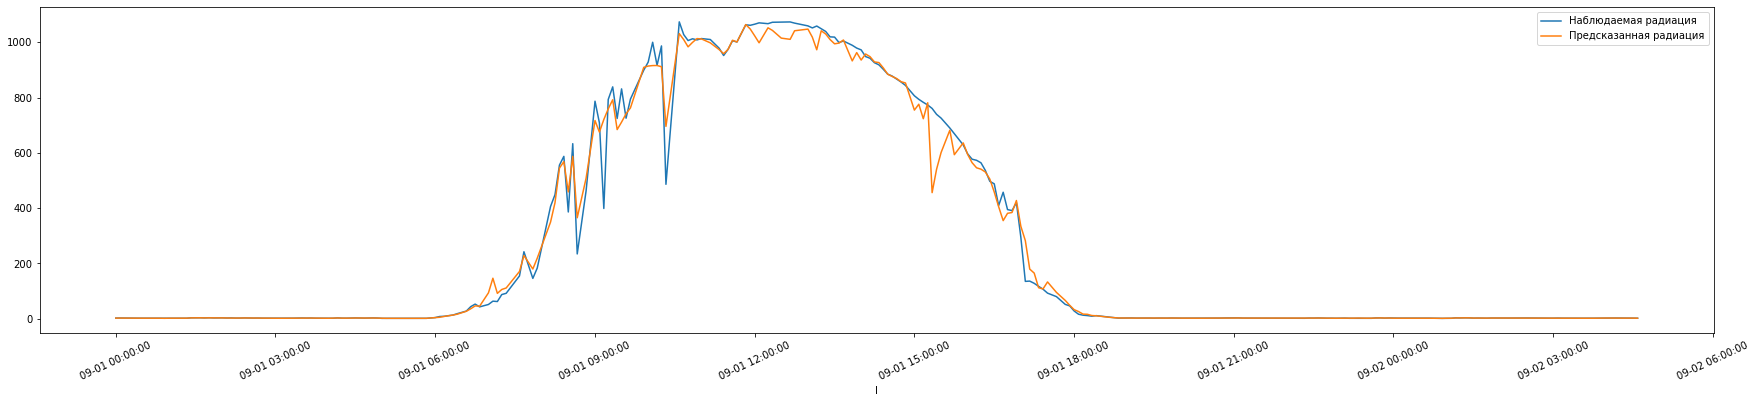

In [15]:
# ax=plt.gca()
# xfmt = md.DateFormatter('%H:%M')
fig = plt.figure(figsize=(30,6))
ax = fig.add_subplot()
xfmt = md.DateFormatter('%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks( rotation=25 )
plt.xlabel('l')
ax.xaxis_date()
plt.plot(dataset.date_for_plot[:300],dataset.Radiation[:300],label = 'Наблюдаемая радиация')
plt.plot(dataset.date_for_plot[:300],dataset.y_pred[:300],label = 'Предсказанная радиация')
plt.legend()
plt.show()